=== CORE OPERATIONAL KPIs ===


/var/folders/s2/845yqqfs61x7pg7c3r3vb4880000gp/T/ipykernel_35155/3560262924.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "Processing Timestamp": pd.date_range(


,Metric,Value
0,Total Transactions,1000.000000
1,Average Processing Time (Hours),6.150000
2,SLA Compliance Rate (%),89.100000
3,Average Daily Throughput,23.810000


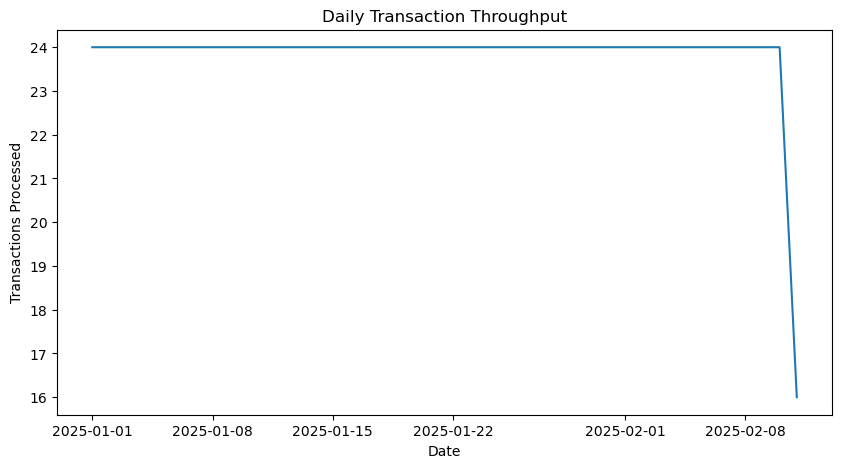

=== SLA PERFORMANCE BY TRANSACTION TYPE (%) ===


,SLA Met (%)
Transaction Type,
Redemption,88.370000
Subscription,88.070000
Transfer,94.120000


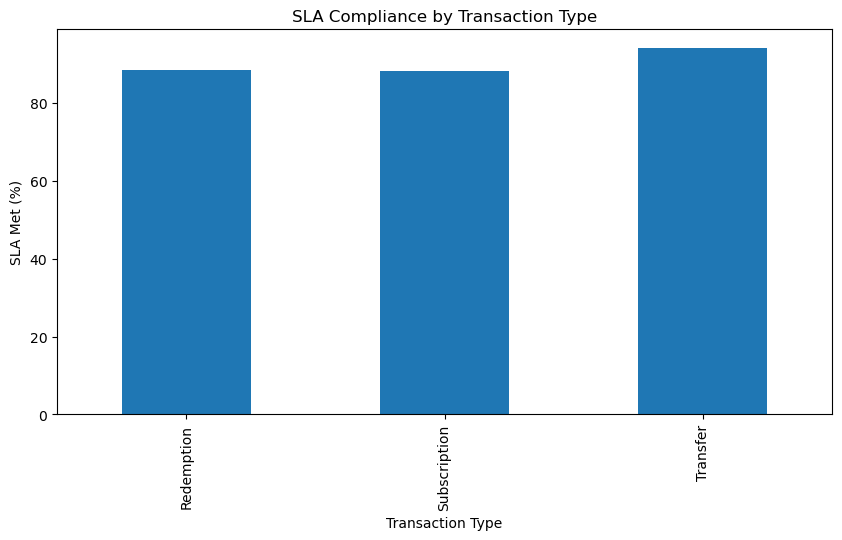

=== VARIANCE & BOTTLENECK ANALYSIS ===


,Average_Time,Std_Deviation,Max_Time
Transaction Type,,,
Redemption,6.170000,1.510000,9.900000
Subscription,6.170000,1.460000,10.790000
Transfer,6.020000,1.520000,9.880000


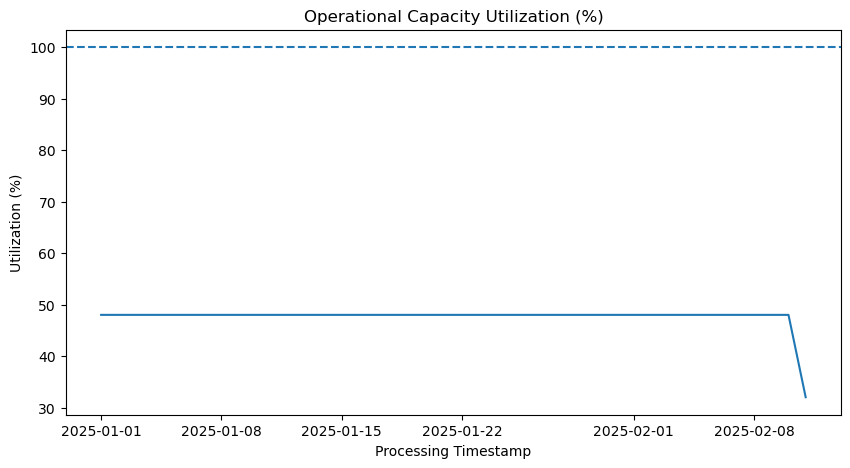

=== KEY INSIGHTS ===

• Strong SLA compliance indicates effective operational controls
• Variance analysis highlights transaction types with higher processing risk
• Throughput and capacity trends support informed resource planning
• Data-driven reporting enables better middle-office and fund services decisions



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Setup
# -----------------------------
np.random.seed(42)
plt.rcParams["figure.figsize"] = (10, 5)


n = 1000

data = pd.DataFrame({
    "Transaction ID": range(1, n + 1),
    "Transaction Type": np.random.choice(
        ["Subscription", "Redemption", "Transfer"],
        size=n,
        p=[0.5, 0.35, 0.15]
    ),
    "Processing Time (Hours)": np.random.normal(6, 1.5, n).clip(1),
    "SLA (Hours)": 8,
    "Processing Timestamp": pd.date_range(
        start="2025-01-01",
        periods=n,
        freq="H"
    )
})

data["SLA Met"] = data["Processing Time (Hours)"] <= data["SLA (Hours)"]

# -----------------------------
# Core Operational KPIs
# -----------------------------
kpis = pd.DataFrame({
    "Metric": [
        "Total Transactions",
        "Average Processing Time (Hours)",
        "SLA Compliance Rate (%)",
        "Average Daily Throughput"
    ],
    "Value": [
        len(data),
        round(data["Processing Time (Hours)"].mean(), 2),
        round(data["SLA Met"].mean() * 100, 2),
        round(data.groupby(data["Processing Timestamp"].dt.date).size().mean(), 2)
    ]
})

print("=== CORE OPERATIONAL KPIs ===")
display(
    kpis.style
        .set_properties(**{"font-weight": "bold"})
        .background_gradient(cmap="Blues")
)


daily_throughput = data.groupby(
    data["Processing Timestamp"].dt.date
).size()

daily_throughput.plot()
plt.title("Daily Transaction Throughput")
plt.xlabel("Date")
plt.ylabel("Transactions Processed")
plt.show()


sla_by_type = (
    data.groupby("Transaction Type")["SLA Met"]
    .mean()
    .mul(100)
    .round(2)
)

print("=== SLA PERFORMANCE BY TRANSACTION TYPE (%) ===")
display(
    sla_by_type.to_frame("SLA Met (%)")
    .style
    .background_gradient(cmap="Greens")
    .set_properties(**{"font-weight": "bold"})
)

sla_by_type.plot(kind="bar")
plt.title("SLA Compliance by Transaction Type")
plt.ylabel("SLA Met (%)")
plt.show()


variance_analysis = (
    data.groupby("Transaction Type")["Processing Time (Hours)"]
    .agg(
        Average_Time="mean",
        Std_Deviation="std",
        Max_Time="max"
    )
    .round(2)
)

print("=== VARIANCE & BOTTLENECK ANALYSIS ===")
display(
    variance_analysis.style
        .background_gradient(cmap="Oranges")
        .set_properties(**{"font-weight": "bold"})
)


assumed_capacity_per_day = 50

capacity_utilization = (
    daily_throughput / assumed_capacity_per_day * 100
)

capacity_utilization.plot()
plt.axhline(100, linestyle="--")
plt.title("Operational Capacity Utilization (%)")
plt.ylabel("Utilization (%)")
plt.show()


print("=== KEY INSIGHTS ===")
print("""
• Strong SLA compliance indicates effective operational controls
• Variance analysis highlights transaction types with higher processing risk
• Throughput and capacity trends support informed resource planning
• Data-driven reporting enables better middle-office and fund services decisions
""")
